In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
model = AnomalyDetector()

In [ ]:
from preprocess import *

In [ ]:
import pandas as pd

In [ ]:
normal =pd.read_csv("/content/drive/MyDrive/SWaT Dataset/SWaT_Normal.csv")
attack= pd.read_csv("/content/drive/MyDrive/SWaT Dataset/SWaT_Attack.csv")

train_df = normal.copy()
#train_df = train_df[:1000]
test_df = attack.copy()

train_df["y"] = normal["Normal/Attack"].replace(to_replace=["Normal", "Attack", "A ttack"], value=[0, 1, 1])
y_train = train_df["y"]
train_df =train_df.drop(columns=["Normal/Attack", " Timestamp","y"], axis=1)
cols = list(train_df.columns)

test_df["y"] = attack["Normal/Attack"].replace(to_replace=["Normal", "Attack", "A ttack"], value=[0, 1, 1])
y_test = test_df["y"]
test_df= test_df.drop(columns=["Normal/Attack", " Timestamp","y"], axis=1)

train_df.dropna(how='all')

from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
train_df_vals = train_df.values
x_scaled = min_max_scaler.fit_transform(train_df_vals)
train_df = pd.DataFrame(x_scaled,columns = cols)

test_df_vals = test_df.values 
x_scaled = min_max_scaler.transform(test_df_vals)
test_df = pd.DataFrame(x_scaled, columns = cols)




In [ ]:
train = pd.concat([train_df, y_train], axis=1)
test = pd.concat([test_df, y_test], axis=1)

In [ ]:
train.to_csv("/content/SWAT_train_processed.csv")
test.to_csv("/content/SWAT_test_processed.csv")

In [ ]:
y_train 

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,y
0,-1.633984,-3.807291,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.912190,0.0,-17.843131,-5.796500,-17.672513,-0.095148,0.0,-0.089482,0.0,1
1,-1.633984,-3.806646,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.912190,0.0,-17.843131,-5.796500,-17.672513,-0.095148,0.0,-0.089482,0.0,1
2,-1.633984,-3.806001,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.912190,0.0,-17.843131,-5.796500,-17.672513,-0.095148,0.0,-0.089482,0.0,1
3,-1.633984,-3.804387,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.912190,0.0,-17.843131,-5.796500,-17.672513,-0.095148,0.0,-0.089482,0.0,1
4,-1.633984,-3.805678,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.912190,0.0,-17.843131,-5.796500,-17.672513,-0.095148,0.0,-0.089482,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494995,0.538489,-0.530054,0.610641,0.578660,0.0,-0.369209,0.091710,-0.401898,0.574180,0.571882,...,0.055828,0.0,-0.070842,2.886472,-0.101112,-0.096008,0.0,-0.089482,0.0,1
494996,0.528309,-0.530699,0.610641,0.578660,0.0,-0.369209,0.091710,-0.401898,0.574180,0.571882,...,0.055828,0.0,-0.070842,2.886472,-0.134322,-0.096008,0.0,-0.089482,0.0,1
494997,0.515865,-0.531345,0.610641,0.578660,0.0,-0.369209,0.091710,-0.399305,0.576599,0.571882,...,0.055828,0.0,-0.070842,2.886472,-0.134322,-0.096008,0.0,-0.089482,0.0,1
494998,0.510209,-0.531022,0.610641,0.578660,0.0,-0.369209,0.091710,-0.399305,0.577082,0.571882,...,0.055828,0.0,-0.070842,2.260671,-0.134322,-0.096008,0.0,-0.089482,0.0,1


In [ ]:
y_test.value_counts()

0    395298
1     54621
Name: y, dtype: int64

In [ ]:
from detector import *

In [ ]:
import pandas as pd
import numpy as np

npz = np.load('/content/12_fault.npz')
npz

In [ ]:
X, y = data['X'], data['y']

In [ ]:
import numpy as np
data = np.load('/content/2_annthyroid.npz', allow_pickle=True)
X,y = data["X"], data["y"]

In [ ]:
X.shape

(7200, 6)

In [ ]:
model = AnomalyDetector(hidden_size = 3,batch_size = 64,num_epochs = 25)
X = pd.DataFrame(X)
model.fit(X[0:5000])

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 25/25 [00:44<00:00,  1.77s/it]
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [ ]:
k,p = model.predict(X)


In [ ]:
y = pd.DataFrame(y, columns = ["Truth"])

In [ ]:
y["Truth"].value_counts()

0    6666
1     534
Name: Truth, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
import seaborn as sns

0.6012651826980451
Threshold value is: -16.097052680563127


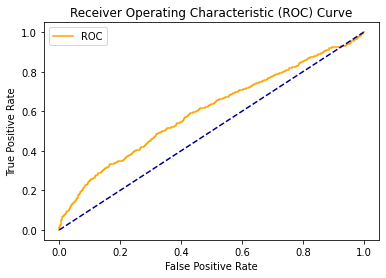

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig("roc_multi.png", transparent  = False)
    plt.show()

#y_true = y_test[10:len(aa)]
#y_scores = aa[10:len(aa)]
y_true = y
y_scores = k

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
pip install ruptures pyod combo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=d61a21b3a3e5e25ba3f0240b07b8ae306d27573167e59f46e8c7d1acb786f812
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42885 sha256=2f8bd89dc559206512e0b933a783a27cdaf102479875f23054ec23d837d91e3e
  Stored in directory: /root/.cache/pip/wheels/ec/44/39/0667fea44a2dfe692cc2a51f0f79ea49b9dee7def53594ef2e
Successfully built pyod combo


In [ ]:
from pyod.models.ecod import ECOD
from pyod.models.abod import ABOD
from pyod.models.lunar import LUNAR
from pyod.models.vae import VAE
from 

In [ ]:
mod = ABOD()

In [ ]:
mod.fit(X[0:3000])

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [ ]:
k = mod.predict(X[3000::])

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
k = mod.predict_proba(X)

In [ ]:
pip install ruptures pyod combo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=574053f68cfeeb1b8024509da4254704dff8d9c915c9014595faaabb4dad993c
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42885 sha256=491666957bbc24efd03c0b2046977712aeeeb539a944714d90753fec3eb0ab87
  Stored in directory: /root/.cache/pip/wheels/ec/44/39/0667fea44a2dfe692cc2a51f0f79ea49b9dee7def53594ef2e
Successfully built pyod combo


In [ ]:
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR

In [ ]:
x = LUNAR(n_epochs = 50,verbose = 1)
x.fit(train_df)
y = x.predict(test_df)

KeyboardInterrupt: ignored

In [ ]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
accuracy_score(y_test,y)


In [ ]:
roc_auc_score(y_test,y)